In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import pandas_profiling as pp

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Regressor
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [2]:
filename='2022_LoL_esports_match_data_from_OraclesElixir_20221108.csv'
data=pd.read_csv(filename)

data.head()

/var/folders/fs/lrwkh5_x0h949p618ylxjmmm0000gn/T/ipykernel_21502/338673311.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv(filename)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,121.0,391.0,345.0,14.0,0.0,1.0,0.0,0.0,1.0,0.0
1,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,100.0,541.0,-275.0,-11.0,2.0,3.0,2.0,0.0,5.0,1.0
2,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,119.0,-475.0,153.0,1.0,0.0,3.0,0.0,3.0,3.0,2.0
3,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,149.0,-793.0,-1343.0,-34.0,2.0,1.0,2.0,3.0,3.0,0.0
4,ESPORTSTMNT01_2690210,complete,NaN,LCK CL,2022,Spring,0,2022-01-10 07:44:08,1,12.01,...,21.0,443.0,-497.0,7.0,1.0,2.0,2.0,0.0,6.0,2.0


In [3]:
#cleaning data
df=data[['goldat15','xpat15','csat15','killsat15','barons']].copy()

df.dropna(axis=0,how='any',inplace=True)
df.info()
index_names=df[df['barons']>1].index
df.drop(index_names,inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121882 entries, 0 to 146507
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   goldat15   121882 non-null  float64
 1   xpat15     121882 non-null  float64
 2   csat15     121882 non-null  float64
 3   killsat15  121882 non-null  float64
 4   barons     121882 non-null  float64
dtypes: float64(5)
memory usage: 5.6 MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 117578 entries, 0 to 146506
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   goldat15   117578 non-null  float64
 1   xpat15     117578 non-null  float64
 2   csat15     117578 non-null  float64
 3   killsat15  117578 non-null  float64
 4   barons     117578 non-null  float64
dtypes: float64(5)
memory usage: 5.4 MB


,goldat15,xpat15,csat15,killsat15,barons
0,5025.0,7560.0,135.0,0.0,0.0
1,5366.0,5320.0,89.0,2.0,0.0
2,5118.0,6942.0,120.0,0.0,0.0
3,5461.0,4591.0,115.0,2.0,0.0
4,3836.0,3588.0,28.0,1.0,0.0


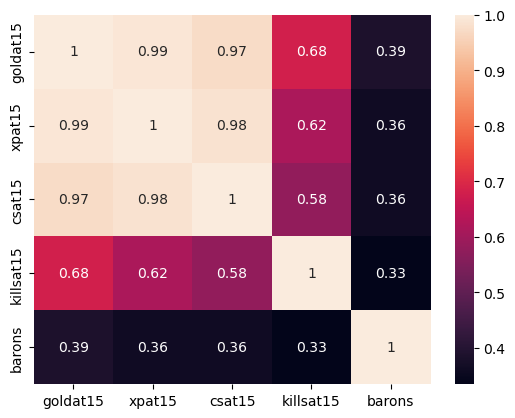

In [4]:
sns.heatmap(df.corr(),annot=True)
plt.show()


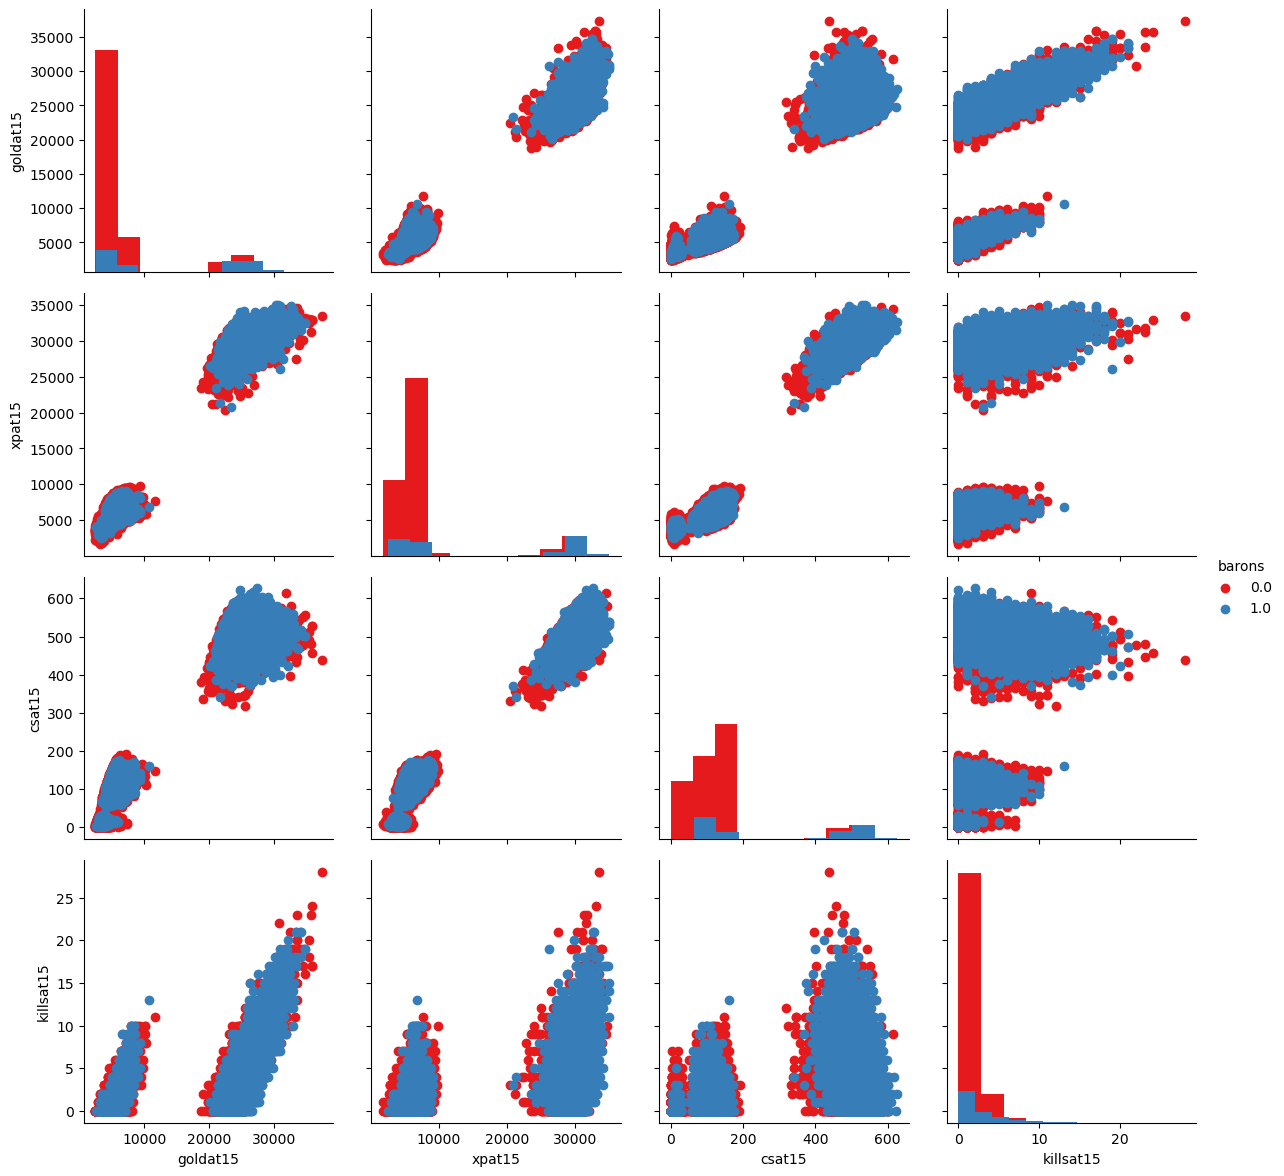

In [5]:
#checking relationship between the 4 features and baron
g = sns.PairGrid(data=df, vars=['goldat15','xpat15','csat15','killsat15'],
             hue='barons',height=3,palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()
plt.show()
 

In [6]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

print(X.shape)
print(y.shape)

(117578, 4)
(117578, 1)


In [7]:
#fitting data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
tree=DecisionTreeClassifier()
model=tree.fit(X_train,y_train)

In [8]:
y_pred=model.predict(X_test)
print(y_pred)

print(y_test)

[0. 0. 0. ... 0. 0. 0.]
        barons
39172      0.0
82170      1.0
102238     1.0
103387     0.0
72568      0.0
...        ...
74875      0.0
36863      0.0
118276     0.0
54984      1.0
80289      0.0

[35274 rows x 1 columns]


In [9]:
len(y_test['barons'].tolist())

35274

In [10]:
len(y_pred)

35274

In [11]:
#model's accuracy score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))#

              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     29695
         1.0       0.38      0.40      0.39      5579

    accuracy                           0.80     35274
   macro avg       0.63      0.64      0.64     35274
weighted avg       0.81      0.80      0.80     35274



In [12]:
#splitting dataset 

X=df.drop(['barons'],axis=1)
X=X.dropna(axis=0,how='any')
y=df[['barons']]
y=y.dropna(axis=0,how='any')

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3) 
regr=DecisionTreeClassifier()
model=regr.fit(X_train,y_train)

y_pred=model.predict(X_test)



from sklearn.metrics import classification_report
accscore=classification_report(y_test,y_pred)
print(accscore)


              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     29545
         1.0       0.38      0.39      0.38      5729

    accuracy                           0.80     35274
   macro avg       0.63      0.63      0.63     35274
weighted avg       0.80      0.80      0.80     35274



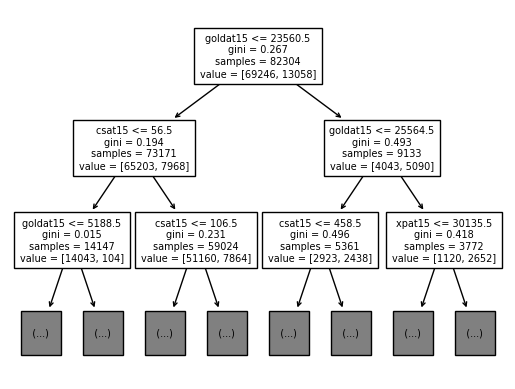

<Figure size 500x500 with 0 Axes>

In [13]:
#visual representation of model
from sklearn import tree
tree.plot_tree(model,feature_names=['goldat15','xpat15','csat15','killsat15'],
               max_depth=2,fontsize=7)
plt.figure(figsize=(5,5))
plt.show()

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[25896,  3649],
       [ 3494,  2235]])